In [2]:
import cv2
import time

# Initialize the camera
cap = cv2.VideoCapture(0)

# Check if the camera is opened successfully
if not cap.isOpened():
    print("Error: Could not open camera")
    exit()

# Create a folder to save the captured images
import os
if not os.path.exists("captured_images"):
    os.mkdir("captured_images")

# Capture and save 20 images
for i in range(20):
    # Capture a frame from the camera
    ret, frame = cap.read()

    if not ret:
        print("Error: Could not capture a frame")
        break

    # Resize the frame to 70x70 pixels
    frame = cv2.resize(frame, (70, 70))

    # Generate a unique filename for each image
    filename = f"captured_images/image_{i + 1}.jpg"

    # Save the resized frame as an image
    cv2.imwrite(filename, frame)

    print(f"Captured image {i + 1}")

    # Wait for 0.5 seconds before capturing the next image
    time.sleep(0.5)

# Release the camera
cap.release()

print("Image capture complete")


Captured image 1
Captured image 2
Captured image 3
Captured image 4
Captured image 5
Captured image 6
Captured image 7
Captured image 8
Captured image 9
Captured image 10


KeyboardInterrupt: 

In [ ]:
pip install opencv-python opencv-python-headless numpy imutils


In [1]:
import cv2
import numpy as np
import imutils
import time

# Load the pre-trained hand detection model
net = cv2.dnn.readNetFromCaffe('deploy.prototxt', 'mobilenet_v2.caffemodel')

# Initialize the camera
cap = cv2.VideoCapture(0)

# Check if the camera is opened successfully
if not cap.isOpened():
    print("Error: Could not open camera")
    exit()

# Create a window to display the captured images
cv2.namedWindow("Captured Images")

# Capture and display images with hand detection
for i in range(20):
    # Capture a frame from the camera
    ret, frame = cap.read()

    if not ret:
        print("Error: Could not capture a frame")
        break

    # Resize the frame for faster processing (optional)
    frame = imutils.resize(frame, width=400)

    # Get the frame dimensions
    (h, w) = frame.shape[:2]

    # Create a blob from the frame
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 0.2, (300, 300), (127.5, 127.5, 127.5), swapRB=True)

    # Set the input to the neural network and perform a forward pass
    net.setInput(blob)
    detections = net.forward()

    # Loop over the detections
    for j in range(detections.shape[2]):
        confidence = detections[0, 0, j, 2]

        # If the confidence is above a certain threshold (adjust as needed)
        if confidence > 0.5:
            # Calculate the bounding box coordinates
            box = detections[0, 0, j, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype(int)

            # Draw the bounding box and label
            cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
            cv2.putText(frame, f"Hand {j + 1}", (startX, startY - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Show the frame in the "Captured Images" window
    cv2.imshow("Captured Images", frame)

    # Generate a unique filename for each image
    filename = f"captured_images/image_{i + 1}.jpg"

    # Save the frame as an image
    cv2.imwrite(filename, frame)

    print(f"Captured image {i + 1}")

    # Wait for 0.5 seconds before capturing the next image
    time.sleep(0.5)

    # Check for a key press to exit
    key = cv2.waitKey(1)
    if key == 27:  # Press Esc to exit
        break

# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\caffe\caffe_io.cpp:1126: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "deploy.prototxt" in function 'cv::dnn::ReadProtoFromTextFile'


In [ ]:
import cv2
import mediapipe as mp
import os
import time

# Create a folder to save the captured images
output_folder = "hand_images"
os.makedirs(output_folder, exist_ok=True)

# Initialize MediaPipe Hand module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Set up MediaPipe drawing utility
mp_drawing = mp.solutions.drawing_utils

# Initialize variables for image capture
image_count = 0
interval = 0.5  # Interval in seconds

# Open a video capture device (0 for default camera)
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the camera
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe Hand
    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        # Draw landmarks on the frame
        for landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(frame, landmarks, mp_hands.HAND_CONNECTIONS)

        # Capture and save an image every 0.5 seconds
        current_time = time.time()
        if current_time - interval >= image_count * interval:
            image_count += 1
            image_filename = os.path.join(output_folder, f"hand_image_{image_count}.png")
            # Crop the image to 70x70 pixels
            cropped_frame = frame[100:170, 100:170]
            cv2.imwrite(image_filename, cropped_frame)
            print(f"Image {image_count} saved")

    # Display the frame with landmarks
    cv2.imshow('Hand Detection', frame)

    # Exit the loop when the user presses 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
import mediapipe as mp
import os
import time

# Create a folder to save the captured images
output_folder = "hand_images"
os.makedirs(output_folder, exist_ok=True)

# Initialize MediaPipe Hand module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Set up MediaPipe drawing utility
mp_drawing = mp.solutions.drawing_utils

# Initialize variables for image capture
image_count = 0
interval = 1  # Interval in seconds

# Open a video capture device (0 for default camera)
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the camera
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe Hand
    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        # Draw landmarks on the frame
        for landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(frame, landmarks, mp_hands.HAND_CONNECTIONS)

        # Capture and save an image every 0.5 seconds
        current_time = time.time()
        if current_time - interval >= image_count * interval:
            image_count += 1
            image_filename = os.path.join(output_folder, f"hand_image_{image_count}.png")
            # Crop the image to include the hand with some space around it (adjust as needed)
            hand_landmarks = results.multi_hand_landmarks[0]
            min_x, min_y, max_x, max_y = float('inf'), float('inf'), -float('inf'), -float('inf')
            for landmark in hand_landmarks.landmark:
                x, y, _ = frame.shape[1] * landmark.x, frame.shape[0] * landmark.y, landmark.z
                min_x, min_y, max_x, max_y = min(min_x, x), min(min_y, y), max(max_x, x), max(max_y, y)
            min_x, min_y, max_x, max_y = int(min_x), int(min_y), int(max_x), int(max_y)
            margin = 50  # Adjust the margin as needed
            min_x -= margin
            min_y -= margin
            max_x += margin
            max_y += margin
            cropped_frame = frame[min_y:max_y, min_x:max_x]
            cv2.imwrite(image_filename, cropped_frame)
            print(f"Image {image_count} saved")

    # Display the frame with landmarks
    cv2.imshow('Hand Detection', frame)

    # Show the captured image being taken
    if image_count > 0:
        cv2.imshow('Captured Image', cropped_frame)

    # Exit the loop when the user presses 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
import mediapipe as mp
import os
import time

# Create a folder to save the captured images
output_folder = "hand_images"
os.makedirs(output_folder, exist_ok=True)

# Initialize MediaPipe Hand module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Initialize variables for image capture
image_count = 0
interval = 1  # Interval in seconds

# Open a video capture device (0 for default camera)
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the camera
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe Hand
    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        # Capture and save an image every 0.5 seconds
        current_time = time.time()
        if current_time - interval >= image_count * interval:
            image_count += 1
            image_filename = os.path.join(output_folder, f"hand_image_{image_count}.png")
            # Crop the image to include the hand with some space around it (adjust as needed)
            hand_landmarks = results.multi_hand_landmarks[0]
            min_x, min_y, max_x, max_y = float('inf'), float('inf'), -float('inf'), -float('inf')
            for landmark in hand_landmarks.landmark:
                x, y, _ = frame.shape[1] * landmark.x, frame.shape[0] * landmark.y, landmark.z
                min_x, min_y, max_x, max_y = min(min_x, x), min(min_y, y), max(max_x, x), max(max_y, y)
            min_x, min_y, max_x, max_y = int(min_x), int(min_y), int(max_x), int(max_y)
            margin = 50  # Adjust the margin as needed
            min_x -= margin
            min_y -= margin
            max_x += margin
            max_y += margin
            cropped_frame = frame[min_y:max_y, min_x:max_x]
            cv2.imwrite(image_filename, cropped_frame)
            print(f"Image {image_count} saved")

    # Display the frame without landmarks
    cv2.imshow('Hand Detection', frame)

    # Show the captured image being taken
    if image_count > 0:
        cv2.imshow('Captured Image', cropped_frame)

    # Exit the loop when the user presses 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()


In [2]:
import cv2
import mediapipe as mp
import os
import time

# Create a folder to save the captured images
output_folder = "Fx_newhand_images"
os.makedirs(output_folder, exist_ok=True)

# Initialize MediaPipe Hand module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Initialize variables for image capture
image_count = 0
interval = 2  # Interval in seconds

# Desired size for captured images
desired_size = (70, 70)

# Open a video capture device (0 for default camera)
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the camera
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe Hand
    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        # Capture and save an image every 0.5 seconds
        current_time = time.time()
        if current_time - interval >= image_count * interval:
            image_count += 1
            image_filename = os.path.join(output_folder, f"hand_image_{image_count}.png")
            # Crop the image to include the hand with some space around it (adjust as needed)
            hand_landmarks = results.multi_hand_landmarks[0]
            min_x, min_y, max_x, max_y = float('inf'), float('inf'), -float('inf'), -float('inf')
            for landmark in hand_landmarks.landmark:
                x, y, _ = frame.shape[1] * landmark.x, frame.shape[0] * landmark.y, landmark.z
                min_x, min_y, max_x, max_y = min(min_x, x), min(min_y, y), max(max_x, x), max(max_y, y)
            min_x, min_y, max_x, max_y = int(min_x), int(min_y), int(max_x), int(max_y)
            margin = 50  # Adjust the margin as needed
            min_x -= margin
            min_y -= margin
            max_x += margin
            max_y += margin
            cropped_frame = frame[min_y:max_y, min_x:max_x]
            
            # Resize the image to the desired size (70x70 pixels)
            cropped_frame = cv2.resize(cropped_frame, desired_size)
            
            cv2.imwrite(image_filename, cropped_frame)
            print(f"Image {image_count} saved")

    # Display the frame without landmarks
    cv2.imshow('Hand Detection', frame)

    # Show the captured image being taken
    if image_count > 0:
        cv2.imshow('Captured Image', cropped_frame)

    # Exit the loop when the user presses 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()


Image 1 saved
Image 2 saved
Image 3 saved
Image 4 saved
Image 5 saved
Image 6 saved
Image 7 saved
Image 8 saved
Image 9 saved
Image 10 saved
Image 11 saved
Image 12 saved
Image 13 saved
Image 14 saved
Image 15 saved
Image 16 saved
Image 17 saved
Image 18 saved
Image 19 saved
Image 20 saved
Image 21 saved
Image 22 saved
Image 23 saved
Image 24 saved
Image 25 saved
Image 26 saved
Image 27 saved
Image 28 saved
Image 29 saved
Image 30 saved
Image 31 saved
Image 32 saved
Image 33 saved
Image 34 saved
Image 35 saved
Image 36 saved
Image 37 saved
Image 38 saved
Image 39 saved
Image 40 saved
Image 41 saved
Image 42 saved
Image 43 saved
Image 44 saved
Image 45 saved
Image 46 saved
Image 47 saved
Image 48 saved
Image 49 saved
Image 50 saved
Image 51 saved
Image 52 saved
Image 53 saved
Image 54 saved
Image 55 saved
Image 56 saved
Image 57 saved
Image 58 saved
Image 59 saved
Image 60 saved
Image 61 saved
Image 62 saved
Image 63 saved
Image 64 saved
Image 65 saved
Image 66 saved
Image 67 saved
Imag

In [ ]:
import cv2
import os
import pandas as pd

# Folder containing the captured hand images
image_folder = "B_newhand_images"

# Target label for all the images
target_label = 'B'

# Initialize an empty list to store image data
image_data = []

# Iterate through the image files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".png"):
        # Read the image and flatten it to a 1D array
        image_path = os.path.join(image_folder, filename)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img_data = img.flatten()

        # Append the target label as the first element
        img_data = [target_label] + img_data.tolist()

        # Append the image data to the list
        image_data.append(img_data)

# Create a DataFrame from the image data
df = pd.DataFrame(image_data)

# Define the CSV file path
csv_file = "hand_images.csv"

# Save the DataFrame to a CSV file
df.to_csv(csv_file, index=False, header=False)

print(f"CSV file '{csv_file}' created successfully.")


In [1]:
import cv2
import os
import pandas as pd

# Existing CSV file containing images with target 'A'
existing_csv_file = "hand_images_E.csv"

# New folder containing images with target 'B'
new_image_folder = "F_newhand_images"

# Target label for the new images
new_target_label = 'F'

# Initialize an empty list to store image data
new_image_data = []

# Iterate through the new image files in the folder
for filename in os.listdir(new_image_folder):
    if filename.endswith(".png"):
        # Read the image and flatten it to a 1D array
        image_path = os.path.join(new_image_folder, filename)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img_data = img.flatten()

        # Append the new target label as the first element
        img_data = [new_target_label] + img_data.tolist()

        # Append the new image data to the list
        new_image_data.append(img_data)

# Load the existing CSV file into a DataFrame
existing_df = pd.read_csv(existing_csv_file, header=None)

# Create a DataFrame from the new image data
new_df = pd.DataFrame(new_image_data)

# Concatenate the existing and new DataFrames
combined_df = pd.concat([existing_df, new_df])

# Define the updated CSV file path
updated_csv_file = "hand_images_F.csv"

# Save the updated DataFrame to the CSV file
combined_df.to_csv(updated_csv_file, index=False, header=False)

print(f"CSV file '{updated_csv_file}' updated successfully.")


CSV file 'hand_images_F.csv' updated successfully.


In [3]:
import cv2
import pandas as pd
import random

# Load the CSV file containing the dataset (assuming you have already loaded the dataset)
data = pd.read_csv('hand_images_F.csv')

# Select a random row from the dataset
random_index = random.randint(0, len(data) - 1)
image_data = data.iloc[random_index, 1:].values  # Extract pixel values
image_label = data.iloc[random_index, 0]  # Extract label (if needed)

# Reshape the image data to 70x70 pixels
image_data = image_data.reshape(70, 70).astype('uint8')

# Display the image in grayscale
cv2.imshow('Gray Image', image_data)
cv2.waitKey(0)
cv2.destroyAllWindows()


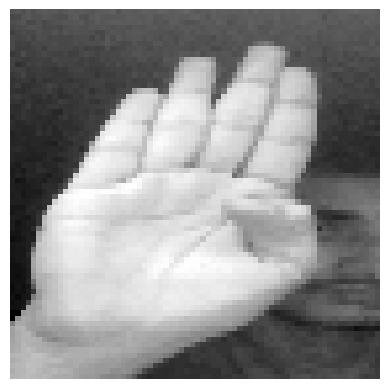

In [4]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('hand_images_F.csv')

# Extract a grayscale image from the dataset (assuming it's the first row)
image_data = data.iloc[1000, 1:].values
image = np.array(image_data, dtype=np.uint8).reshape(70, 70)

# Display the image in the output terminal
plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle


data = pd.read_csv('hand_images_F.csv')

data = shuffle(data, random_state=42)

X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

X = X / 255.0

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


y = tf.keras.utils.to_categorical(y)


X = X.reshape(-1, 70, 70, 1)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')  # Number of classes for sign language digits
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_data=(X_val, y_val))


model.save('sign_language_model.h5')

test_loss, test_acc = model.evaluate(X_val, y_val)
print("Validation accuracy:", test_acc)


Epoch 1/20
112/112 [==============================] - 10s 76ms/step - loss: 0.8316 - accuracy: 0.6798 - val_loss: 0.0951 - val_accuracy: 0.9764
Epoch 2/20
112/112 [==============================] - 8s 75ms/step - loss: 0.1387 - accuracy: 0.9570 - val_loss: 0.0507 - val_accuracy: 0.9832
Epoch 3/20
112/112 [==============================] - 8s 75ms/step - loss: 0.0771 - accuracy: 0.9719 - val_loss: 0.0145 - val_accuracy: 0.9944
Epoch 4/20
112/112 [==============================] - 8s 74ms/step - loss: 0.0542 - accuracy: 0.9826 - val_loss: 0.0094 - val_accuracy: 0.9989
Epoch 5/20
112/112 [==============================] - 8s 73ms/step - loss: 0.0438 - accuracy: 0.9857 - val_loss: 0.0065 - val_accuracy: 0.9978
Epoch 6/20
112/112 [==============================] - 8s 74ms/step - loss: 0.0240 - accuracy: 0.9919 - val_loss: 0.0036 - val_accuracy: 0.9989
Epoch 7/20
112/112 [==============================] - 8s 74ms/step - loss: 0.0273 - accuracy: 0.9902 - val_loss: 0.0087 - val_accuracy: 0.997

C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 0s 17ms/step - loss: 0.0027 - accuracy: 0.9989
Validation accuracy: 0.9988776445388794


In [6]:
import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model


model = load_model('sign_language_model.h5')


alphabet_symbols = ['A', 'B', 'C', 'D', 'E', 'F']


mp_hands = mp.solutions.hands
hands = mp_hands.Hands()


cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if not ret:
        break

    
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    
    results = hands.process(rgb_frame)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
           
            height, width, _ = frame.shape
            landmarks = [(int(l.x * width), int(l.y * height)) for l in hand_landmarks.landmark]

        
            padding = 30  # Adjust the padding as needed
            min_x = max(0, min(landmarks, key=lambda p: p[0])[0] - padding)
            max_x = min(width, max(landmarks, key=lambda p: p[0])[0] + padding)
            min_y = max(0, min(landmarks, key=lambda p: p[1])[1] - padding)
            max_y = min(height, max(landmarks, key=lambda p: p[1])[1] + padding)

           
            if max_x > min_x and max_y > min_y:
                
                cropped_hand = frame[min_y:max_y, min_x:max_x]

               
                gray_hand = cv2.cvtColor(cropped_hand, cv2.COLOR_BGR2GRAY)

              
                resized_hand = cv2.resize(gray_hand, (70, 70))
                normalized_hand = resized_hand / 255.0
                input_data = normalized_hand.reshape(1, 70, 70, 1)

               
                prediction = model.predict(input_data)
                predicted_label = np.argmax(prediction)
                predicted_symbol = alphabet_symbols[predicted_label]

               
                cv2.putText(frame, f'Predicted: {predicted_symbol}', (10, 50),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

          
                cv2.imshow('Cropped Hand', normalized_hand)

    
    cv2.imshow('Camera and Prediction', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


In [5]:
import pandas as pd

# Replace 'your_dataset.csv' with the path to your CSV file
csv_file_path = 'hand_images_F.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print("Contents of the CSV dataset:")
print(df)


Contents of the CSV dataset:
      A  109  107  106  103  102  102.1  109.1  111  105  ...  109.69  113.79  \
0     A   78   78   83   81   78     80     84   79   83  ...     104      96   
1     A   79   79   83   83   80     78     84   83   80  ...     104      96   
2     A   76   82   86   86   78     89     92   91   89  ...      98      93   
3     A   90   92   91   90   90     90     86   93   90  ...      95      83   
4     A   84   83   90   82   85     85     87   90   82  ...      94      83   
...  ..  ...  ...  ...  ...  ...    ...    ...  ...  ...  ...     ...     ...   
4446  F  108  108  112  112   99    103    108  114  112  ...     221     217   
4447  F  110  114  117  112  114    118    113  113  104  ...     223     219   
4448  F  110  114  111  109  107    100    107  113  111  ...     215     218   
4449  F  113  116  112  116  108    103    114  106  111  ...     216     214   
4450  F  116  116  115  115  110    112    117  114  115  ...     215     215   